# Bokeh

In [4]:
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
# from bokeh.io import reset_output
# reset_output()

In [5]:
# suggested to run this command in its own cell at beginning
output_notebook()

Loading BokehJS ...

# Lines/scatter

In [6]:
from math import pi
from bokeh.models.annotations import ColumnDataSource, Span, BoxAnnotation, LabelSet

p = figure(plot_width=400, plot_height=400, y_axis_type="log", title='My Circles')


# ColumnDataSource is a mapping of column names (strings) to sequences of values. 
# The mapping is provided by passing a Python dict with string keys and simple Python lists as values. 
# The values could also be NumPy arrays, or Pandas sequences.
source = ColumnDataSource(data=dict(x = [1,2,3,4,5],
                                    y = [6,7,2,4,5],
                                    y2 = [i * 5 for i in [6,7,2,4,5]],
                                    names=['A', 'B', 'C', 'D', 'E']))


# outline
p.outline_line_width = 7
p.outline_line_alpha = 0.3
p.outline_line_color = "navy"

# add a circle renderer, size based upon data(y), can use 'radius=y'
p.circle(source.data['x'],source.data['y'], size=source.data['y2'], line_color="firebrick", line_width = 2, fill_color="orange", line_dash = [5, 1], fill_alpha=0.5)

p.line(source.data['x'],source.data['y'], line_width=2, legend="sin(x)")

p.yaxis.axis_label = "Pressure"
p.xaxis.major_label_orientation = pi/4

lower_line = Span(location=3, dimension='width', line_color='firebrick', line_width=4)
p.add_layout(lower_line)

lower = BoxAnnotation(top=3, fill_alpha=0.1, fill_color='red')
p.add_layout(lower)

labels = LabelSet(x='x', y='y', text='names', level='glyph',
                  x_offset=5, y_offset=-5, source=source)


p.add_layout(labels)

show(p)

In [7]:
from bokeh.sampledata.autompg import autompg
from bokeh.models import LinearColorMapper, ColorBar
from bokeh.palettes import Viridis256

source = ColumnDataSource(autompg)
color_mapper = LinearColorMapper(palette=Viridis256, low=autompg.weight.min(), high=autompg.weight.max())

p = figure(x_axis_label='Year', y_axis_label='MPG', tools='', toolbar_location='above')
p.circle(x='yr', y='mpg', color={'field': 'weight', 'transform': color_mapper}, size='mpg', alpha=0.6, source=source)

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Weight')
p.add_layout(color_bar, 'right')

show(p)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/bokeh/core/json_encoder.py:80: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [8]:
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.stocks import AAPL

df = pd.DataFrame(AAPL)
df['date'] = pd.to_datetime(df['date'])

# create a new plot with a datetime axis type
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")

p.line(df['date'], df['close'], color='navy', alpha=0.5)


show(p)

In [9]:
df.head()

,adj_close,close,date,high,low,open,volume
0,31.68,130.31,2000-03-01,132.06,118.50,118.56,38478000
1,29.66,122.00,2000-03-02,127.94,120.69,127.00,11136800
2,31.12,128.00,2000-03-03,128.23,120.00,124.87,11565200
3,30.56,125.69,2000-03-06,129.13,125.00,126.00,7520000
4,29.87,122.87,2000-03-07,127.44,121.12,126.44,9767600


In [10]:
import itertools

from bokeh.palettes import Spectral11

w=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','G1','G2','G3','G4','G5','G6','G7','G8', 'G9','G10','G11','G12']

lines = np.random.random((100, len(w))) + np.arange(24)
df = pd.DataFrame(lines)
df.columns = w

line_dash_styles = [[10, 0], [20, 1], [10, 1], [5, 1]]
p = figure()
for name, color, line_dash in zip(w, itertools.cycle(Spectral11), itertools.cycle(line_dash_styles)):
    p.line(np.arange(100), df[name], color=color, legend=name, line_dash=line_dash)
    
p.legend.location = "top_left"
show(p)

# Histograms/CDF/PDF

In [11]:
# Histogram
import scipy.special

from bokeh.layouts import gridplot

p1 = figure(title="Normal Distribution (μ=0, σ=0.5)",tools="save",
            background_fill_color="#E8DDCB")

mu, sigma = 0, 0.5

measured = np.random.normal(mu, sigma, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(-2, 2, 1000)
pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
cdf = (1+scipy.special.erf((x-mu)/np.sqrt(2*sigma**2)))/2

p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p1.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p1.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p1.legend.location = "center_right"
p1.legend.background_fill_color = "darkgrey"
p1.xaxis.axis_label = 'x'
p1.yaxis.axis_label = 'Pr(x)'



p2 = figure(title="Log Normal Distribution (μ=0, σ=0.5)", tools="save",
            background_fill_color="#E8DDCB")

mu, sigma = 0, 0.5

measured = np.random.lognormal(mu, sigma, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 8.0, 1000)
pdf = 1/(x* sigma * np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mu)**2 / (2*sigma**2))
cdf = (1+scipy.special.erf((np.log(x)-mu)/(np.sqrt(2)*sigma)))/2

p2.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p2.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p2.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p2.legend.location = "center_right"
p2.legend.background_fill_color = "darkgrey"
p2.xaxis.axis_label = 'x'
p2.yaxis.axis_label = 'Pr(x)'



p3 = figure(title="Gamma Distribution (k=1, θ=2)", tools="save",
            background_fill_color="#E8DDCB")

k, theta = 1.0, 2.0

measured = np.random.gamma(k, theta, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 20.0, 1000)
pdf = x**(k-1) * np.exp(-x/theta) / (theta**k * scipy.special.gamma(k))
cdf = scipy.special.gammainc(k, x/theta) / scipy.special.gamma(k)

p3.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p3.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p3.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p3.legend.location = "center_right"
p3.legend.background_fill_color = "darkgrey"
p3.xaxis.axis_label = 'x'
p3.yaxis.axis_label = 'Pr(x)'



p4 = figure(title="Weibull Distribution (λ=1, k=1.25)", tools="save",
            background_fill_color="#E8DDCB")

lam, k = 1, 1.25

measured = lam*(-np.log(np.random.uniform(0, 1, 1000)))**(1/k)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 8, 1000)
pdf = (k/lam)*(x/lam)**(k-1) * np.exp(-(x/lam)**k)
cdf = 1 - np.exp(-(x/lam)**k)

p4.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color="#036564", line_color="#033649")
p4.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p4.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p4.legend.location = "center_right"
p4.legend.background_fill_color = "darkgrey"
p4.xaxis.axis_label = 'x'
p4.yaxis.axis_label = 'Pr(x)'


show(gridplot(p1,p2,p3,p4, ncols=2, plot_width=400, plot_height=400, toolbar_location=None))

In [12]:
data = pd.read_excel('scipy/AMZN-DUK-KO.xlsx')
data.head()

,Date,AMZN,DUK,KO
0,2007-01-03,38.700001,34.971017,17.874906
1,2007-01-04,38.900002,35.044103,17.882263
2,2007-01-05,38.369999,34.240172,17.757161
3,2007-01-08,37.500000,34.294985,17.871225
4,2007-01-09,37.779999,34.130544,17.885944


In [13]:
# bokeh hist of above
from bokeh.plotting import figure, show, output_notebook
from numpy import histogram, linspace
from scipy.stats.kde import gaussian_kde

output_notebook()

bins = range(0,1010,10)

p = figure(plot_width=600, plot_height=300)

# plot actual hist for comparison
hist, edges = histogram(data.AMZN, density=True, bins=bins)
hist1, edges1 = histogram(data.DUK, density=True, bins=bins)
hist2, edges2 = histogram(data.KO, density=True, bins=bins)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], alpha=0.4)
p.quad(top=hist1, bottom=0, left=edges1[:-1], right=edges1[1:], color='firebrick', alpha=0.4)
p.quad(top=hist2, bottom=0, left=edges2[:-1], right=edges2[1:], color='green', alpha=0.4)

show(p)

Loading BokehJS ...

# Bar/Boxplot


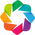

:BoxWhisker   [cyl,origin]   (mpg)

In [14]:
# Boxplot, used holoviews
import holoviews as hv
hv.extension('bokeh')

from bokeh.sampledata.autompg import autompg as df

title = "MPG by Cylinders and Data Source, Colored by Cylinders"
boxwhisker = hv.BoxWhisker(df, ['cyl', 'origin'], 'mpg', label=title)

plot_opts = dict(show_legend=False, width=400)
style = dict(color='cyl')

boxwhisker(plot=plot_opts, style=style)

In [15]:
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts, color=Spectral6))

p = figure(x_range=fruits, plot_height=250, y_range=(0, 9), title="Fruit Counts")
p.vbar(x='fruits', top='counts', width=0.9, color='color', legend="fruits", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

In [16]:
from bokeh.sampledata.commits import data
from bokeh.transform import jitter

DAYS = ['Sun', 'Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon']

source = ColumnDataSource(data)

p = figure(plot_width=800, plot_height=300, y_range=DAYS, x_axis_type='datetime', 
           title="Commits by Time of Day (US/Central) 2012—2016")

p.circle(x='time', y=jitter('day', width=0.6, range=p.y_range),  source=source, alpha=0.3)

p.xaxis[0].formatter.days = ['%Hh']
p.x_range.range_padding = 0
p.ygrid.grid_line_color = None

show(p)

# Data Selection/Hover

In [17]:
from bokeh.models import HoverTool

source = ColumnDataSource(
        data=dict(
            x=[1, 2, 3, 4, 5],
            y=[2, 5, 8, 2, 7],
            desc=['A', 'b', 'C', 'd', 'E'],
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("desc", "@desc"),
        ]
    )

p = figure(plot_width=300, plot_height=300, tools=[hover], title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

show(p)

In [18]:
p = figure(plot_width=300, plot_height=300, tools="tap", title="Select a circle")
renderer = p.circle([1, 2, 3, 4, 5], [2, 5, 8, 2, 7], size=50,

                    # set visual properties for selected glyphs
                    selection_color="firebrick",

                    # set visual properties for non-selected glyphs
                    nonselection_fill_alpha=0.2,
                    nonselection_fill_color="grey",
                    nonselection_line_color="firebrick",
                    nonselection_line_alpha=1.0)

show(p)

In [19]:
from bokeh.models.tools import HoverTool
from bokeh.sampledata.glucose import data

subset = data.loc['2010-10-06']

x, y = subset.index.to_series(), subset['glucose']

# Basic plot setup
p = figure(width=600, height=300, x_axis_type="datetime", title='Hover over points')

p.line(x, y, line_dash="4 4", line_width=1, color='gray')

cr = p.circle(x, y, size=20,
              fill_color="grey", hover_fill_color="firebrick",
              fill_alpha=0.05, hover_alpha=0.3,
              line_color=None, hover_line_color="white")

p.add_tools(HoverTool(tooltips=None, renderers=[cr], mode='hline'))

show(p)

# Gridplot + data selection

In [20]:
from bokeh.models import ColumnDataSource

x = list(range(-20, 21))
y0, y1 = [abs(xx) for xx in x], [xx**2 for xx in x]

# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=x, y0=y0, y1=y1))

TOOLS = "box_select,help" # can use 'lasso_select'

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=300, height=300)
left.circle('x', 'y0', source=source)

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=300, height=300)
right.circle('x', 'y1', source=source)

p = gridplot([[left, right]])

show(p)

In [1]:
from bokeh.plotting import figure
from bokeh.resources import CDN
from bokeh.embed import file_html

plot = figure()
plot.circle([1,2], [3,4])

html = file_html(plot, CDN, "my plot")

In [2]:
html

'\n<!DOCTYPE html>\n<html lang="en">\n    <head>\n        <meta charset="utf-8">\n        <title>my plot</title>\n        \n<link rel="stylesheet" href="https://cdn.pydata.org/bokeh/release/bokeh-0.12.14.min.css" type="text/css" />\n        \n<script type="text/javascript" src="https://cdn.pydata.org/bokeh/release/bokeh-0.12.14.min.js"></script>\n<script type="text/javascript">\n    Bokeh.set_log_level("info");\n</script>\n    </head>\n    <body>\n        \n        <div class="bk-root">\n            <div class="bk-plotdiv" id="f474fad0-32a0-4727-8aca-e757765a9e5f"></div>\n        </div>\n        \n        <script type="application/json" id="ac57ea9c-8aec-459c-a832-d3a25fdb58d0">\n          {"edc552d0-74cf-4be8-80c6-544c3e81efd9":{"roots":{"references":[{"attributes":{},"id":"9429fce3-f764-4ee3-a8ca-002309e467a4","type":"BasicTickFormatter"},{"attributes":{},"id":"06e68b01-e281-4017-8452-be11da574b97","type":"BasicTicker"},{"attributes":{"plot":null,"text":""},"id":"f8b3fba1-25c9-4e9a-b

In [3]:
from bokeh.plotting import figure
from bokeh.embed import components

plot = figure()
plot.circle([1,2], [3,4])

script, div = components(plot)

In [5]:
div

'\n<div class="bk-root">\n    <div class="bk-plotdiv" id="fcb2e726-1a6e-467c-8af6-3eabf3a492c6"></div>\n</div>'